In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
#create the data

###יצירת תת קבוצה:  קוים
#מספר נק' בתת קבוצה
n_points = 200
thickness = 0.05  # העובי של הקווים
exclusion_radius = 0.07  # רדיוס בטיחות - מונע חפיפה של הרעש על האותיות

# פונקציה להוספת רעש (עובי) לנקודות
def add_noise(points, scale=thickness):
    return points + np.random.normal(scale=scale, size=points.shape)

# עם שני אלכסונים וקו אופקי
a_left = np.column_stack((np.linspace(-0.6, 0, n_points), np.linspace(-1, 1, n_points)))  # קו שמאלי
a_right = np.column_stack((np.linspace(0.6, 0, n_points), np.linspace(-1, 1, n_points)))   # קו ימני
a_middle = np.column_stack((np.linspace(-0.3, 0.3, int(n_points/2)), np.full(int(n_points/2), 0)))  # קו אופקי

#קו אנכי
i_body = np.column_stack((np.full(n_points, 0.8), np.linspace(-1, 1, n_points)))  # קו אנכי

# הוספת רעש
a_left = add_noise(a_left)
a_right = add_noise(a_right)
a_middle = add_noise(a_middle)
i_body = add_noise(i_body)

# איחוד הקבוצה
X_AI = np.vstack((a_left, a_right, a_middle, i_body))
y_AI = np.ones(X_AI.shape[0])  # כל הנקודות באותיות יקבלו תווית 1

# יצירת רעש רנדומלי והפרדת חפיפה בין קבוצת קוווים לקבוצת רקע
n_noise = 800
X_noise = []
while len(X_noise) < n_noise:
    candidate = np.random.rand(1, 2) * 2 - 1  # נקודה רנדומלית בטווח [-1,1]x[-1,1]
    distances = np.linalg.norm(X_AI - candidate, axis=1)  # חישוב מרחק מכל נקודה אדומה
    if np.all(distances > exclusion_radius):  # אם הנקודה רחוקה מספיק, נוסיף אותה
        X_noise.append(candidate[0])

X_noise = np.array(X_noise)
y_noise = np.zeros(X_noise.shape[0])  # כל נקודות הרקע יקבלו תווית 0

# שילוב הדאטה – אותיות + רעש
X = np.vstack((X_AI, X_noise))
y = np.hstack((y_AI, y_noise))

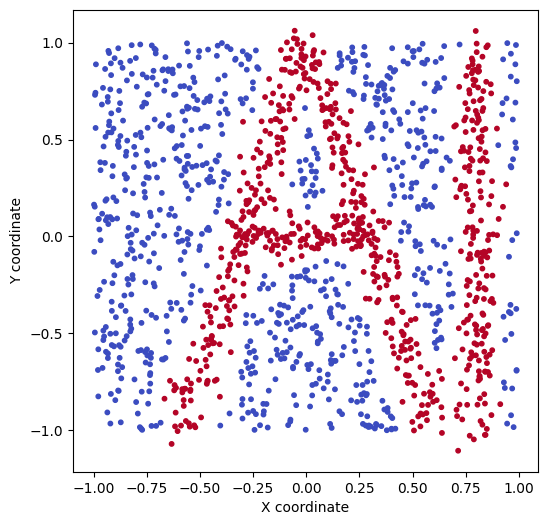

In [3]:
#look at the data-
# הצגת הנתונים
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state= 42)

In [42]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = None)

])

In [43]:
# compile the model
model.compile  (optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                 loss = tf.keras.losses.BinaryCrossentropy(from_logits= True),
                 metrics = ['accuracy']
                 )

In [22]:
# train the model
history =model.fit (X_train, y_train,epochs = 1000,
           batch_size =32,verbose= 0,
           validation_data = (X_test, y_test))

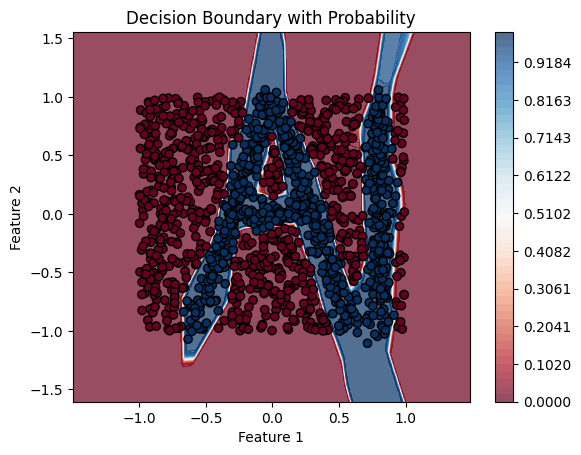

In [23]:
%run /content/PlotBoudary.ipynb
tf_plot_boundary(X,y,model)

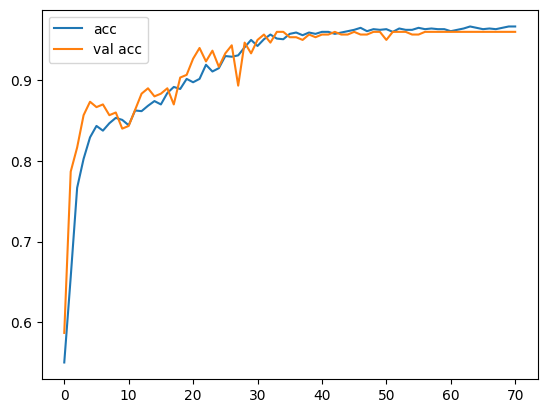

In [47]:
# plot history
plt.plot(history.history['accuracy'], label ='acc')
plt.plot(history.history['val_accuracy'], label ='val acc')
plt.legend()

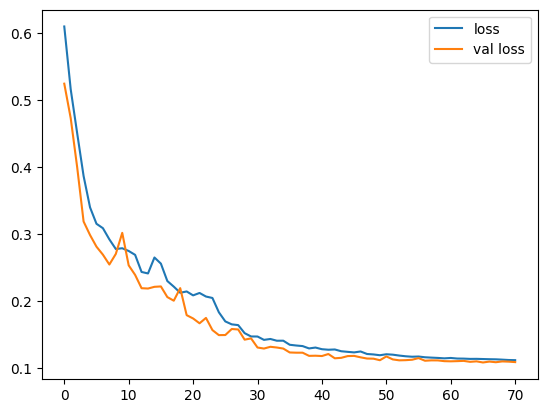

In [48]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()

In [27]:
history

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 5)

In [ ]:
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss', patience=5,factor =0.5 )

In [44]:
calbacks = [tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 5),
           tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss', patience=3,factor =0.5 ) ]

In [46]:
# train the model
history =model.fit (X_train, y_train,epochs = 400,
           batch_size =32,
           validation_data = (X_test, y_test),
                    callbacks = [calbacks])

Epoch 1/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5300 - loss: 0.6398 - val_accuracy: 0.5867 - val_loss: 0.5247 - learning_rate: 0.0100
Epoch 2/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6189 - loss: 0.5272 - val_accuracy: 0.7867 - val_loss: 0.4733 - learning_rate: 0.0100
Epoch 3/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7624 - loss: 0.4596 - val_accuracy: 0.8167 - val_loss: 0.4004 - learning_rate: 0.0100
Epoch 4/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7778 - loss: 0.4155 - val_accuracy: 0.8567 - val_loss: 0.3192 - learning_rate: 0.0100
Epoch 5/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.3398 - val_accuracy: 0.8733 - val_loss: 0.2990 - learning_rate: 0.0100
Epoch 6/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8419 - loss: 0.3235 - val_accuracy: 0.8667 - val_loss: 0.2816 - learning_rate: 0.0100
Epoch 7/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8285 - loss: 0.3102 - val_acc